## Умножение матриц

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(123)
n = 4
m = 4
A = np.random.randint(1, 10, (n, m))
print(f'матрица A\n{A}')
B = np.random.randint(1, 10, (m, n))
print(f'матрица B\n {B}')
C = np.dot(A, B)
print(f'матрица C (произведение матриц A и B)\n {C}')

матрица A
[[3 3 7 2]
 [4 7 2 1]
 [2 1 1 4]
 [5 1 1 5]]
матрица B
 [[2 8 4 3]
 [5 8 3 5]
 [9 1 8 4]
 [5 7 2 6]]
матрица C (произведение матриц A и B)
 [[94 69 81 64]
 [66 97 55 61]
 [38 53 27 39]
 [49 84 41 54]]


### Тривиальный алгоритм за O($n^3$)

In [2]:
def matrix_multiply_trivial(A, B, n):
    C = np.random.randint(1, 10, (A.shape[0], B.shape[1]))
    print(C.shape)
    for k in range(A.shape[0]):
        for j in range(A.shape[0]):
            c = 0
            for i in range(A.shape[1]):
                c += A[k][i] * B[i][j]
            C[k, j] = c
    return C

In [3]:
matrix_multiply_trivial(A, B, A.shape[0])

(4, 4)


array([[94, 69, 81, 64],
       [66, 97, 55, 61],
       [38, 53, 27, 39],
       [49, 84, 41, 54]])

Не будем заморачиваться на копировании элементов (хотя надо работать с индексами)

### Алгоритм разделяй и властвуй за O($n^3$)

In [4]:
def split_matrix(M):
    temp = np.hsplit(M, 2)
    M11, M21 = np.vsplit(temp[0], 2)
    M12, M22 = np.vsplit(temp[1], 2)
    return M11, M12, M21, M22

In [5]:
def matrix_divide_and_conquer_copy(A, B, n):
    C = np.random.randint(1, 10, (n, n))
    if n == 1:
        C[0][0] = A[0][0]*B[0][0]
    else:
        n_2 = int(n/2)
        C11, C12, C21, C22 = split_matrix(C)
        A11, A12, A21, A22 = split_matrix(A)
        B11, B12, B21, B22 = split_matrix(B)
        C11 = matrix_divide_and_conquer_copy(A11, B11, n_2) + matrix_divide_and_conquer_copy(A12, B21, n_2)
        C12 = matrix_divide_and_conquer_copy(A11, B12, n_2) + matrix_divide_and_conquer_copy(A12, B22, n_2)
        C21 = matrix_divide_and_conquer_copy(A21, B11, n_2) + matrix_divide_and_conquer_copy(A22, B21, n_2)
        C22 = matrix_divide_and_conquer_copy(A21, B12, n_2) + matrix_divide_and_conquer_copy(A22, B22, n_2)
        C = np.vstack([np.hstack([C11, C12]), np.hstack([C21, C22])])
    return C

In [6]:
matrix_divide_and_conquer_copy(A, B, A.shape[0])

array([[94, 69, 81, 64],
       [66, 97, 55, 61],
       [38, 53, 27, 39],
       [49, 84, 41, 54]])

### Алгоритм Штрассена за O($n^{2.8}$)

In [7]:
def matrix_shtrassen(A, B, n):
    C = np.random.randint(1, 10, (n, n))
    if n == 1:
        C[0][0] = A[0][0]*B[0][0]
    else:
        n_2 = int(n/2)
        C11, C12, C21, C22 = split_matrix(C)
        A11, A12, A21, A22 = split_matrix(A)
        B11, B12, B21, B22 = split_matrix(B)
        P1 = matrix_divide_and_conquer_copy(A11, B12, n_2) - matrix_divide_and_conquer_copy(A11, B22, n_2)
        P2 = matrix_divide_and_conquer_copy(A11, B22, n_2) + matrix_divide_and_conquer_copy(A12, B22, n_2)
        P3 = matrix_divide_and_conquer_copy(A21, B11, n_2) + matrix_divide_and_conquer_copy(A22, B11, n_2)
        P4 = matrix_divide_and_conquer_copy(A22, B21, n_2) - matrix_divide_and_conquer_copy(A22, B11, n_2)
        P5 = (matrix_divide_and_conquer_copy(A11, B11, n_2) + matrix_divide_and_conquer_copy(A11, B22, n_2) +
                matrix_divide_and_conquer_copy(A22, B11, n_2) + matrix_divide_and_conquer_copy(A22, B22, n_2))
        P6 = (matrix_divide_and_conquer_copy(A12, B21, n_2) + matrix_divide_and_conquer_copy(A12, B22, n_2) -
                matrix_divide_and_conquer_copy(A22, B21, n_2) - matrix_divide_and_conquer_copy(A22, B22, n_2))
        P7 = (matrix_divide_and_conquer_copy(A11, B11, n_2) + matrix_divide_and_conquer_copy(A11, B12, n_2) - 
                matrix_divide_and_conquer_copy(A21, B11, n_2) - matrix_divide_and_conquer_copy(A21, B12, n_2))
        
        C11 = P5 + P4 - P2 + P6
        C12 = P1 + P2
        C21 = P3 + P4
        C22 = P5 + P1 - P3 - P7
        C = np.vstack([np.hstack([C11, C12]), np.hstack([C21, C22])])
    return C

In [8]:
matrix_shtrassen(A, B, A.shape[0])

array([[94, 69, 81, 64],
       [66, 97, 55, 61],
       [38, 53, 27, 39],
       [49, 84, 41, 54]])

### Визуальное сравнение скорости работы алгоритмов

(4, 4)
(16, 16)
(64, 64)
(256, 256)


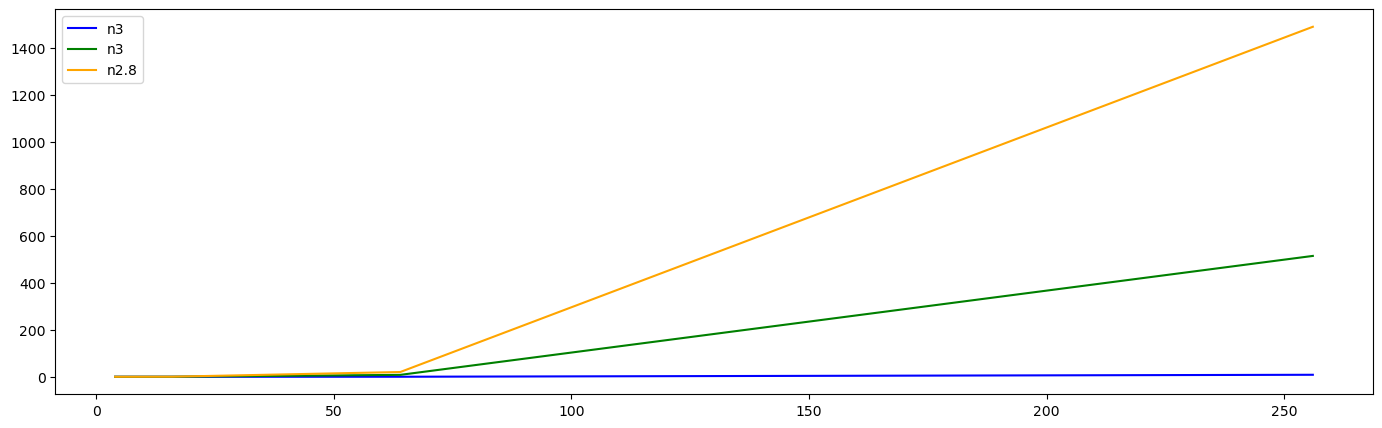

In [9]:
def count_time(func, A, B, n):
    start_time = time.time()
    func(A, B, n)
    return(time.time() - start_time)
    
lst_n = []
lst_time_trivial = []
lst_time_divide = []
lst_time_shrassen = []
n = 1

for x in range(1, 5, 1):
    n = 4**x
    A = np.random.randint(1, 10, (n, n))
    B = np.random.randint(1, 10, (n, n))
    lst_n.append(n)
    lst_time_trivial.append(count_time(matrix_multiply_trivial, A, B, A.shape[0]))
    lst_time_divide.append(count_time(matrix_divide_and_conquer_copy, A, B, A.shape[0]))
    lst_time_shrassen.append(count_time(matrix_shtrassen, A, B, A.shape[0]))
    
plt.figure(figsize=(17, 5))
plt.plot(lst_n, lst_time_trivial, label='n3', color='blue')
plt.plot(lst_n, lst_time_divide, label='n3', color='green')
plt.plot(lst_n, lst_time_shrassen, label='n2.8', color='orange')
plt.legend()
plt.show()